<a href="https://colab.research.google.com/github/MujabiMaarifa/ProgrammingLanguages/blob/main/EngineeringFirePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
#load the dataset
df = pd.read_csv("Indoor Fire Dataset with Distributed Multi-Sensor Nodes_Industrial Hall.csv")
df.head()

,Date,Sensor_ID,CO2_Room,scenario_label,progress_label,experiment_number,H2_Room,PM05_Room,PM100_Room,PM10_Room,...,PM_Total_Room,VOC_Room_RAW,Valid_Experiment,fire,nuisance,Temperature_Room,Humidity_Room,CO_Room,anomaly_label,anomaly_scenario
0,2023-07-10 09:30:27+02:00,sensornode0009,926.0,Background,Ignition,0.0,0.0,22.0,0.0,3.0,...,25.0,0.1,1.0,0.0,0.0,28.2,47.0,0.54,0.0,NaN
1,2023-07-10 09:30:27+02:00,sensornode0008,821.0,Background,Ignition,0.0,0.0,23.0,0.0,3.0,...,26.0,0.2,1.0,0.0,0.0,28.2,48.1,0.31,0.0,NaN
2,2023-07-10 09:30:30+02:00,sensornode0010,599.0,Background,Ignition,0.0,0.2,19.0,0.0,2.0,...,22.0,0.0,1.0,0.0,0.0,27.7,48.4,0.10,0.0,NaN
3,2023-07-10 09:30:32+02:00,sensornode0012,919.0,Background,Ignition,0.0,0.1,21.0,0.0,3.0,...,24.0,0.0,1.0,0.0,0.0,27.3,47.9,0.13,0.0,NaN
4,2023-07-10 09:30:33+02:00,sensornode0015,737.0,Background,Ignition,0.0,0.1,22.0,0.0,3.0,...,25.0,0.0,1.0,0.0,0.0,27.0,49.4,0.00,0.0,NaN


In [3]:
#Exploratory Data Analysis (EDA)
df.describe()

,CO2_Room,experiment_number,H2_Room,PM05_Room,PM100_Room,PM10_Room,PM25_Room,PM40_Room,PM_Room_Typical_Size,PM_Total_Room,VOC_Room_RAW,Valid_Experiment,fire,nuisance,Temperature_Room,Humidity_Room,CO_Room,anomaly_label,anomaly_scenario
count,248502.000000,248502.000000,248502.000000,248502.000000,248502.000000,248502.000000,248502.000000,248502.000000,248502.000000,248502.000000,248502.000000,248502.0,248502.000000,248502.000000,248502.000000,248502.000000,248502.00000,248502.00000,40565.000000
mean,639.862420,0.426789,1.260386,145.877063,0.019344,21.611102,0.847780,0.101705,0.477424,169.151146,1.307157,1.0,0.110748,0.038869,28.673868,42.729748,0.58100,0.16581,16.715173
std,173.034775,1.186904,1.456919,707.137390,0.559562,111.602642,13.797021,2.414040,0.057265,824.702789,1.392570,0.0,0.313820,0.193283,2.628347,5.492144,2.65074,0.37191,8.961976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,20.400000,32.800000,0.00000,0.00000,1.000000
25%,530.000000,0.000000,0.200000,14.000000,0.000000,2.000000,0.000000,0.000000,0.440000,17.000000,0.300000,1.0,0.000000,0.000000,26.900000,38.600000,0.00000,0.00000,8.000000
50%,639.000000,0.000000,0.800000,19.000000,0.000000,2.000000,0.000000,0.000000,0.470000,22.000000,0.900000,1.0,0.000000,0.000000,28.800000,42.700000,0.18000,0.00000,19.000000
75%,760.000000,0.000000,1.600000,37.000000,0.000000,5.000000,0.000000,0.000000,0.500000,43.000000,1.900000,1.0,0.000000,0.000000,30.500000,46.500000,0.64000,0.00000,24.000000
max,2628.000000,7.000000,49.200000,28685.000000,127.000000,7447.000000,2654.000000,498.000000,1.230000,34168.000000,36.200000,1.0,1.000000,1.000000,35.200000,69.800000,216.81000,1.00000,32.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248502 entries, 0 to 248501
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  248502 non-null  object 
 1   Sensor_ID             248502 non-null  object 
 2   CO2_Room              248502 non-null  float64
 3   scenario_label        248502 non-null  object 
 4   progress_label        246712 non-null  object 
 5   experiment_number     248502 non-null  float64
 6   H2_Room               248502 non-null  float64
 7   PM05_Room             248502 non-null  float64
 8   PM100_Room            248502 non-null  float64
 9   PM10_Room             248502 non-null  float64
 10  PM25_Room             248502 non-null  float64
 11  PM40_Room             248502 non-null  float64
 12  PM_Room_Typical_Size  248502 non-null  float64
 13  PM_Total_Room         248502 non-null  float64
 14  VOC_Room_RAW          248502 non-null  float64
 15  

In [5]:
df.isnull().sum()

,0
Date,0
Sensor_ID,0
CO2_Room,0
scenario_label,0
progress_label,1790
experiment_number,0
H2_Room,0
PM05_Room,0
PM100_Room,0
PM10_Room,0


In [6]:
#check the structure of the data set(rows, columns)
df.shape

(248502, 23)

In [7]:
df.columns

Index(['Date', 'Sensor_ID', 'CO2_Room', 'scenario_label', 'progress_label',
       'experiment_number', 'H2_Room', 'PM05_Room', 'PM100_Room', 'PM10_Room',
       'PM25_Room', 'PM40_Room', 'PM_Room_Typical_Size', 'PM_Total_Room',
       'VOC_Room_RAW', 'Valid_Experiment', 'fire', 'nuisance',
       'Temperature_Room', 'Humidity_Room', 'CO_Room', 'anomaly_label',
       'anomaly_scenario'],
      dtype='object')

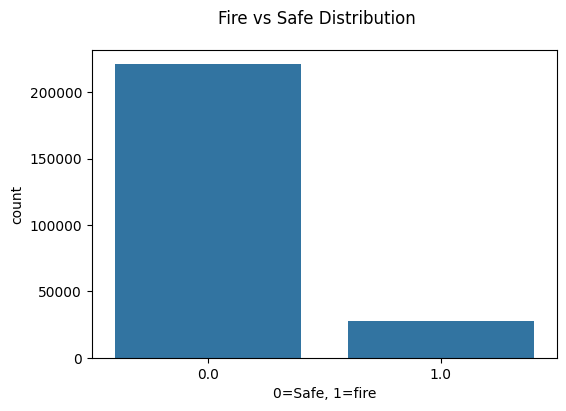

In [8]:
#data visualization
plt.figure(figsize=(6,4))
sns.countplot(x="fire", data=df)
plt.suptitle("Fire vs Safe Distribution")
plt.xlabel("0=Safe, 1=fire")
plt.ylabel("count")
plt.show()

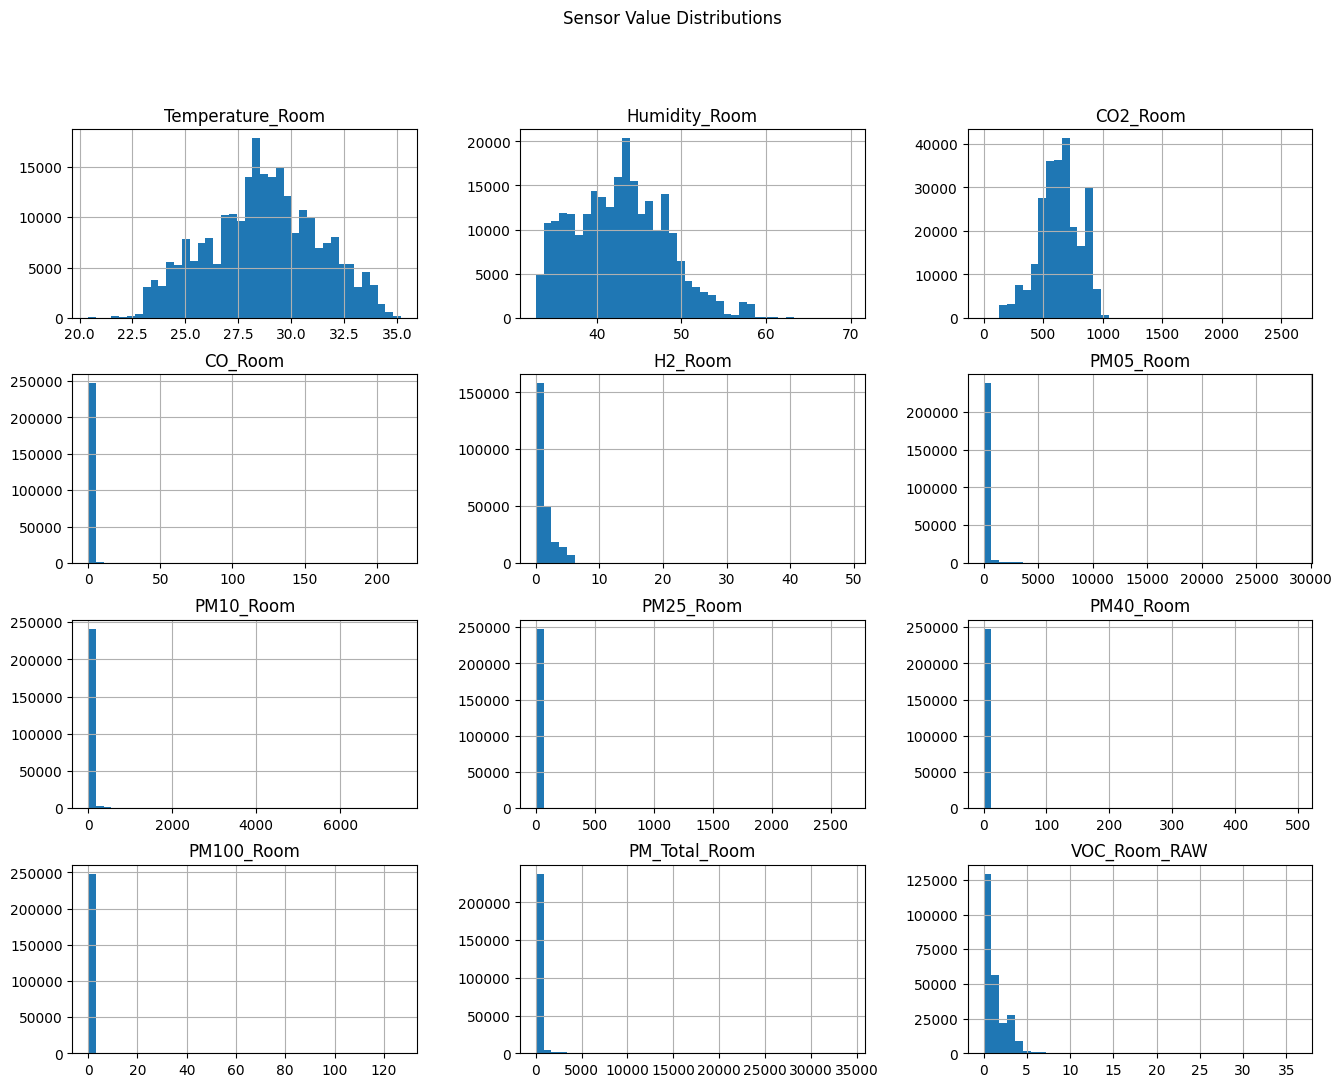

In [9]:
features = [
    "Temperature_Room", "Humidity_Room",
    "CO2_Room", "CO_Room", "H2_Room",
    "PM05_Room", "PM10_Room", "PM25_Room",
    "PM40_Room", "PM100_Room",
    "PM_Total_Room", "VOC_Room_RAW"
]

df[features].hist(bins=40, figsize=(16,12))
plt.suptitle("Sensor Value Distributions")
plt.show()


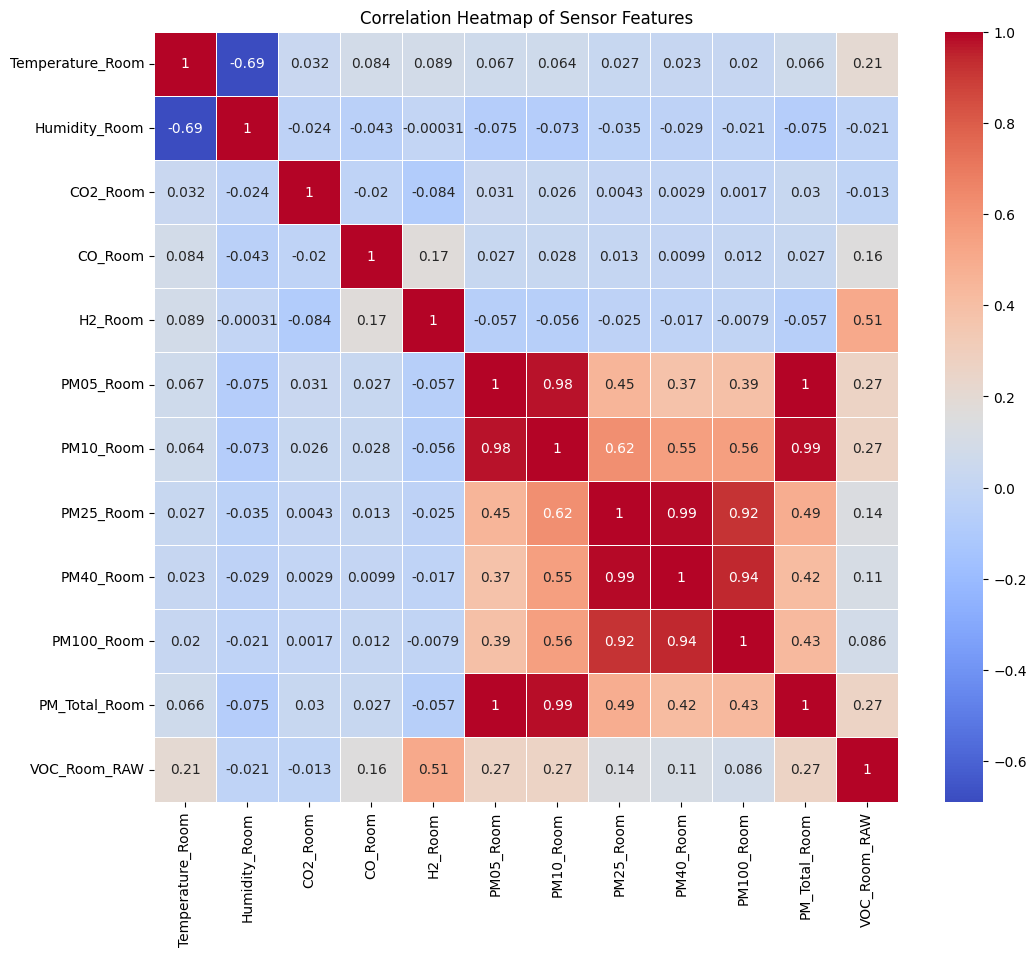

In [12]:
plt.figure(figsize=(12,10))
corr = df[features].corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    linewidths=0.5,
    annot=True
)

plt.title("Correlation Heatmap of Sensor Features")
plt.show()


In [13]:
fire_corr = df[features + ["fire"]].corr()["fire"].sort_values(ascending=False)

fire_corr


,fire
fire,1.000000
PM05_Room,0.445768
PM_Total_Room,0.441961
PM10_Room,0.421851
PM25_Room,0.126942
VOC_Room_RAW,0.126378
PM40_Room,0.080607
PM100_Room,0.070344
Temperature_Room,0.064137
CO2_Room,0.005251


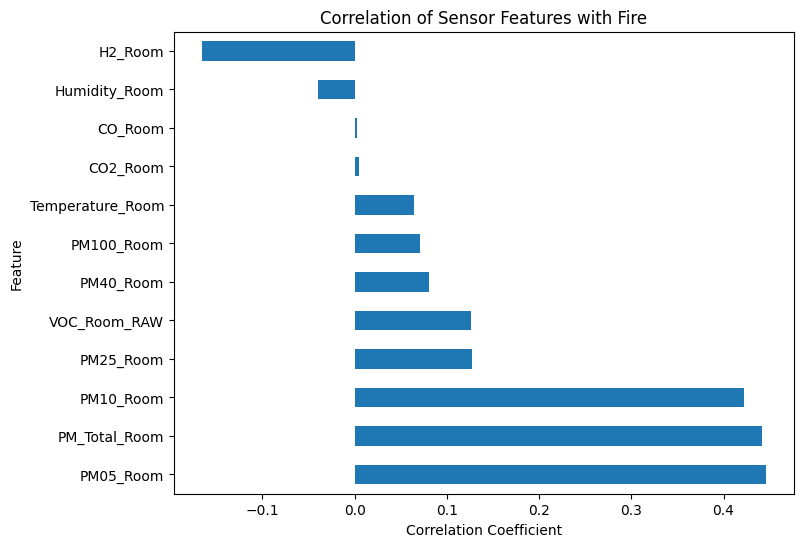

In [14]:
plt.figure(figsize=(8,6))
fire_corr.drop("fire").plot(kind="barh")
plt.title("Correlation of Sensor Features with Fire")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()


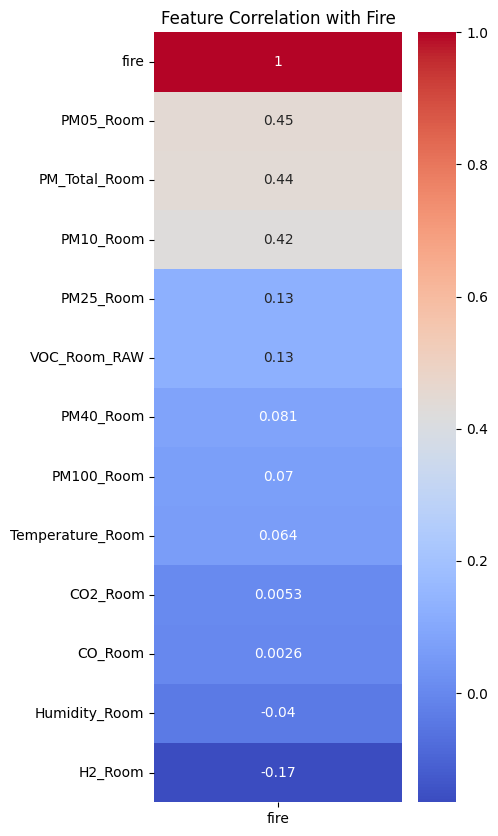

In [15]:
plt.figure(figsize=(4,10))
sns.heatmap(
    fire_corr.to_frame(),
    annot=True,
    cmap="coolwarm",
    cbar=True
)
plt.title("Feature Correlation with Fire")
plt.show()


In [18]:
#Define the variables -> dependent[Target], independent variable[drop.fire]
"""Data sampling"""

X = df[features]
y = df["fire"]


In [19]:
#data sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)